In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import Point, Line, Segment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [3]:
dat = pd.read_csv('/content/drive/MyDrive/testData.csv')
X = pd.DataFrame(dat, columns=['A', 'B']).to_numpy()
Y = pd.DataFrame(dat, columns=['Y']).to_numpy()
A = pd.DataFrame(dat, columns=['A']).to_numpy()
B = pd.DataFrame(dat, columns=['B']).to_numpy()

In [4]:
dat

,A,B,Y
0,1,-1,1
1,2,-1,1
2,3,-1,1
3,4,-1,1
4,1,0,1
5,2,0,1
6,3,0,1
7,4,0,1
8,-1,1,1
9,-2,1,1


## Data Visualisation

In [ ]:
n = Y.shape[0]
cat = Y.reshape((n,))
cat.shape 

(32,)

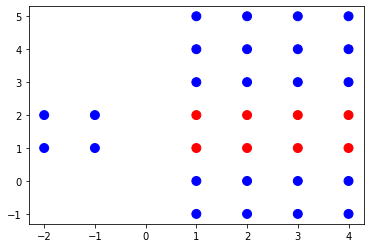

In [ ]:
colors = np.array([ 'r' , 'b' ])
plt.scatter(A, B, s=80 ,c=colors[cat])
plt.savefig('DataPlot.png')
plt.show()

## Border Pair Algorithm

# Nov razdelek

### Choosing a random pattern

In [ ]:
### Choosing a random pattern
n = X.shape[0]
r = np.random.randint(0,n)
r

26

In [ ]:
Y[r][0]

1

In [ ]:
### Creating mask
mask = (Y != Y[r])
mask

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

### Finding nearest Border Pattern

In [ ]:
### Distance matrix
dist = np.zeros((n,n))
for i in range(n):
    temp = np.sum(np.square(X - X[i,:]), axis=1)
    dist[i,:] = np.transpose(temp)

dist

array([[ 0.,  1.,  4., ..., 37., 40., 45.],
       [ 1.,  0.,  1., ..., 36., 37., 40.],
       [ 4.,  1.,  0., ..., 37., 36., 37.],
       ...,
       [37., 36., 37., ...,  0.,  1.,  4.],
       [40., 37., 36., ...,  1.,  0.,  1.],
       [45., 40., 37., ...,  4.,  1.,  0.]])

In [ ]:
### Finding different class patterns closest to chosen pattern
row = dist[r,:]*np.transpose(mask) [0]
d = np.min(row[np.nonzero(row)])
d

4.0

In [ ]:
### Nearest border pattern
s = np.where( row == d)
p = s[0][0]
p

18

In [ ]:
Y[p][0]

0

In [ ]:
X[p]

array([3, 2])

In [ ]:
X[r]

array([3, 4])

### Draw the circle

In [ ]:
### Extract indices of points lying in the circle
def draw_circle(r,p,dist):
  row = dist[r,:]
  arr = np.where(row <= dist[r,p])
  return arr[0]

pts_arr = draw_circle(r,p,dist)
pts_arr

array([18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31])

In [ ]:
### Reduced distance matrix
temp = dist[pts_arr,:]
dist_circle = temp[:,pts_arr]
dist_circle

array([[ 0.,  2.,  1.,  2.,  8.,  5.,  4.,  5., 10.,  9., 10.],
       [ 2.,  0.,  1.,  4.,  2.,  1.,  2.,  5.,  4.,  5.,  8.],
       [ 1.,  1.,  0.,  1.,  5.,  2.,  1.,  2.,  5.,  4.,  5.],
       [ 2.,  4.,  1.,  0., 10.,  5.,  2.,  1.,  8.,  5.,  4.],
       [ 8.,  2.,  5., 10.,  0.,  1.,  4.,  9.,  2.,  5., 10.],
       [ 5.,  1.,  2.,  5.,  1.,  0.,  1.,  4.,  1.,  2.,  5.],
       [ 4.,  2.,  1.,  2.,  4.,  1.,  0.,  1.,  2.,  1.,  2.],
       [ 5.,  5.,  2.,  1.,  9.,  4.,  1.,  0.,  5.,  2.,  1.],
       [10.,  4.,  5.,  8.,  2.,  1.,  2.,  5.,  0.,  1.,  4.],
       [ 9.,  5.,  4.,  5.,  5.,  2.,  1.,  2.,  1.,  0.,  1.],
       [10.,  8.,  5.,  4., 10.,  5.,  2.,  1.,  4.,  1.,  0.]])

In [ ]:
### Reduced Y_matrix
Y_circle = Y[arr]
Y_circle

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
### Reduced X_matrix
X_circle = X[arr]
X_circle

array([[3, 2],
       [2, 3],
       [3, 3],
       [4, 3],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [2, 5],
       [3, 5],
       [4, 5]])

### Find Border Pairs inside the circle

In [ ]:
### Find out all border pair points
def border_pair(dist, X, Y):
  bord_indx = []
  midpts = []
  it = np.nditer(dist, flags=['multi_index'])
  for d in it:
    i,j = it.multi_index
    if i != j and i < j and Y[i] != Y[j]:
        row = dist[i,:]
        column = dist[:,j]
        if d == np.min(row[np.nonzero(row)]) and dist[i,j] == np.min(column[np.nonzero(column)]):
          print(" {} and {} are border pairs".format(i,j) )
          temp = [i,j]
          temp_mid = (X[i,:] + X[j,:])/2        
          bord_indx.append(temp)
          midpts.append(temp_mid)
  return bord_indx, midpts

In [ ]:
### Searching Border Pairs inside the circle 
bord_indx, midpts = border_pair(dist_circle, X_circle, Y_circle)

 0 and 2 are border pairs


In [ ]:
a,b = bord_indx[0]
a

0

In [ ]:
X_circle[a][0]

3

### Draw Border Lines in the circle

In [ ]:
m = len(midpts)
m

1

array([3. , 2.5])

In [ ]:
if m == 1:
  a,b = bord_indx[0]
  x1,y1 = X_circle[a][0], X_circle[a][1]
  x2,y2 = X_circle[b][0], X_circle[b][1]
  P1,P2 = Point(x1,y1), Point(x2,y2)
  L = Segment(P1,P2)
  P = L.perpendicular_bisector()
  

else :
  a = np.arange(m)
  b = np.random.choice(a,2)
  p1,p2 = midpts[b[0]], midpts[b[1]]
  P1,P2 = Point(p1[0],p1[1]), Point(p2[0],p2[1])
  P = Line(P1,P2) 




### Visualise the straight line

In [ ]:
a,b,c = P.coefficients
c

-5/2

In [ ]:
n = Y.shape[0]
cat = Y.reshape((n,))
cat.shape 

(32,)

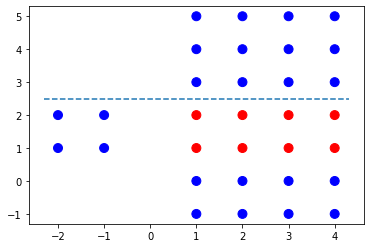

In [ ]:
colors = np.array([ 'r' , 'b' ])
axes = plt.gca()
plt.scatter(A, B, s=80 ,c=colors[cat])
x_vals = np.array(axes.get_xlim())
intercept = -c/b
slope = a/b
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--')
plt.savefig('DataPlot.png')
plt.show()